In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import pandas_datareader as web
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.options.mode.chained_assignment = None  # default='warn'


bayer_stock_prices = pd.read_csv('bayer_stock_prices.csv')
honeywell_stock_prices = pd.read_csv('honeywell_stock_prices.csv')
mmm_stock_prices = pd.read_csv('3m_stock_prices.csv')
Synchrony_stock_prices = pd.read_csv('Synchrony_stock_prices.csv')

#listed alphabetically, we'll keep this order consistent
all_data = [bayer_stock_prices, honeywell_stock_prices, mmm_stock_prices, Synchrony_stock_prices]

labels = ['Bayer', 'HoneyWell', '3M', 'Synchrony Financial']

for i,data in enumerate(all_data):
    all_data[i]=data.dropna(axis=0)
    
for data in all_data:
    df1=data[mmm_stock_prices.isnull().any(axis=1)]

for i,data in enumerate(all_data):
    df=data
    df['Date'] = pd.to_datetime(df['Date'])

    # Using matplotlib to add required columns
    plt.plot(df['Date'], df['Close'])

    # Adding labels
    plt.xlabel('Date')  
    plt.ylabel('Close Price')  
    plt.title(labels[i]) 


In [7]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

symbols = ['syf', 'bayry', 'hon', 'mmm']

for symbol in symbols:
    df = web.DataReader(symbol, 'yahoo', start, end)
    print(symbol + " average")
    print(df["Close"].mean())
    print(symbol + " standard deviation")
    print(df["Close"].std())





syf average
30.991597870735976
syf standard deviation
3.6641997126629406
bayry average
23.353398703282174
bayry standard deviation
4.343520627326744
hon average
113.73010480545929
hon standard deviation
21.66078420053503
mmm average
176.78613987226538
mmm standard deviation
30.02304552644815


AttributeError: module 'matplotlib.pyplot' has no attribute 'setY'

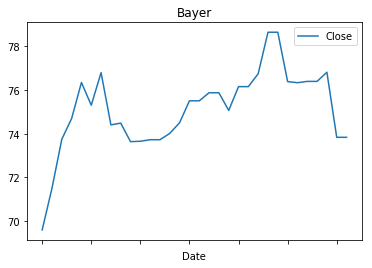

In [7]:
ax = plt.gca()
predicted_prices = pd.read_csv('Predicted/submission.csv')

#for company in list(predicted_prices):
#    if company == 'Date':
#        continue
#    else:
#        predicted_prices.plot(x = 'Date', y = company)

#predicted_prices.plot(x = 'Date', y = 'Bayer', ax = ax)
bayer_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.title("Bayer")
plt.setY("Dollars")
plt.show()
plt.close()

ax = plt.gca()
#predicted_prices.plot(x = 'Date', y = 'Honeywell', ax = ax)
honeywell_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.title("Honeywell")
plt.show()
plt.close()

ax = plt.gca()
#predicted_prices.plot(x = 'Date', y = '3M', ax = ax)
mmm_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.title("3M")
plt.show()
plt.close()

ax = plt.gca()
#predicted_prices.plot(x = 'Date', y = 'Synchrony Financial', ax = ax)
Synchrony_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.title("Synchrony Financial")
plt.show()
plt.close()




In [9]:


predictedBayer = predicted_prices['Bayer'].tolist()
actualBayer = bayer_stock_prices['Close'].tolist()
day = 1
print('Bayer')
print(sqrt(mean_squared_error(actualBayer, predictedBayer)))
for price, realPrice in zip(predictedBayer, actualBayer):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    day += 1

print('Honeywell')
predictedHoneywell = predicted_prices['Honeywell'].tolist()
actualHoneywell = honeywell_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedHoneywell, actualHoneywell):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    day += 1

print('3M')
predictedMMM = predicted_prices['3M'].tolist()
actualMMM = mmm_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedMMM, actualMMM):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    day += 1

print("Synchrony Financial")
predictedSynchrony = predicted_prices['Synchrony Financial'].tolist()
actualSynchrony = Synchrony_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedMMM, actualMMM):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    day += 1




Bayer
12.460573373770675
Difference on Day 1
-1.9930662059652917
Difference on Day 2
2.145167334078451
Difference on Day 3
3.879268177832742
Difference on Day 4
5.106078139162776
Difference on Day 5
3.214540105836548
Difference on Day 6
-0.5339730567614396
Difference on Day 7
6.253143845217366
Difference on Day 8
-1.3392257371767187
Difference on Day 9
0.0023248627476135653
Difference on Day 10
1.9240825757982094
Difference on Day 11
-2.064115544354806
Difference on Day 12
2.8048553804967753
Difference on Day 13
4.600394582642096
Difference on Day 14
11.49346975507845
Difference on Day 15
9.631363636082057
Difference on Day 16
17.098367918358825
Difference on Day 17
6.795694602555287
Difference on Day 18
11.201687479448438
Difference on Day 19
7.220050791794009
Difference on Day 20
3.1048996365564534
Difference on Day 21
7.524653183963224
Difference on Day 22
14.536935263141025
Difference on Day 23
15.149515052563629
Difference on Day 24
14.83246795594387
Difference on Day 25
16.899202

In [10]:
print("Bayer RMSE: " + str(sqrt(mean_squared_error(actualBayer, predictedBayer))))
print("Honeywell RMSE: " + str(sqrt(mean_squared_error(actualHoneywell, predictedHoneywell))))
print("3M RMSE: " + str(sqrt(mean_squared_error(actualMMM, predictedMMM))))
print("Synchrony Financial RMSE: " + str(sqrt(mean_squared_error(actualSynchrony, predictedSynchrony))))


Bayer RMSE: 12.460573373770675
Honeywell RMSE: 7.210476165167713
3M RMSE: 12.57663522217841
Synchrony Financial RMSE: 7.789472279396852
